/home/alex/.local/lib/python3.10/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


Text(0.5, 1.0, '1 PELEHUE')

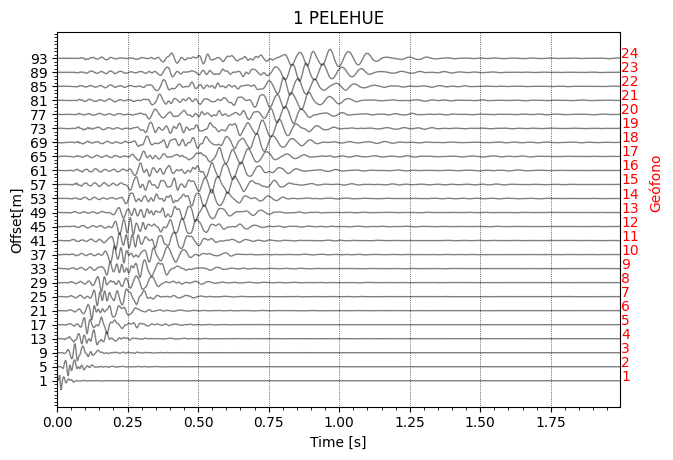

In [50]:
from platform import java_ver
from obspy.core import read
import numpy as np
import matplotlib.pyplot as plt
data1=read('/home/alex/Desktop/Prospeccion-geofisica/Cert1/1.dat')
data2=read('/home/alex/Desktop/Prospeccion-geofisica/Cert1/10.dat')
data1_copy=data1
data2_copy=data2
k=1
i=1
for tr in data1:
    tr.stats.distance=k
    k+=4
    tr.stats.network='AB-PV'
    tr.stats.station=str(i)
    i+=1
j=93
l=1
for tr in data2:
    tr.stats.distance=j
    j-=4
    tr.stats.network='AB-PV'
    tr.stats.station=str(l)
    l+=1
    
fig = plt.figure()
data1.plot(type='section', show=False, fig=fig, orientation='horizontal',scale=1)
list=[]
for i in np.arange(1,97,4):
    list.append(str(i))
# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
for tr in data1:
    ax.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ytick=np.arange(0.001,0.097,0.004)
ax.set_ylabel('Offset[m]')
ax.set_yticks(ytick,list)
ax.text(2.1,0.05,'Geófono',rotation=90,color='r')
ax.set_title('1 PELEHUE')


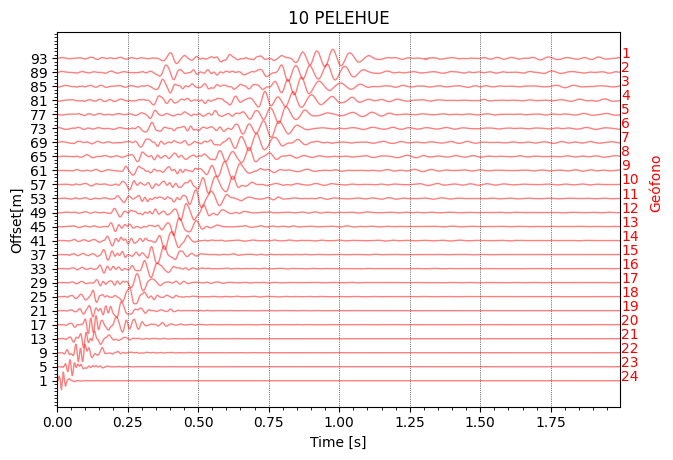

In [65]:
fig2 = plt.figure()
data2.plot(type='section', show=False, fig=fig2, orientation='horizontal',scale=1,color='r')
list=[]
for i in np.arange(1,97,4):
    list.append(str(i))
# Plot customization: Add station labels to offset axis
ax2=fig2.axes[0]
for tr in data2:
    ax2.text(2.0,tr.stats.distance/1000, tr.stats.station,color='r')
ytick=np.arange(0.001,0.097,0.004)
ax2.set_ylabel('Offset[m]')
ax2.set_yticks(ytick,list)
ax2.text(2.1,0.05,'Geófono',rotation=90,color='r')
ax2.set_title('10 PELEHUE')
tr.stats.station
data1.write('1PELEHUE.sac', format='SAC')
data2.write('10PELEHUE.sac',format='SAC') 